In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Data Manipulation
import numpy as np
import pandas as pd

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# KNN
from sklearn.neighbors import KNeighborsClassifier

# SVM
from sklearn.svm import SVC
#LinearRegression
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

In [6]:
heart_df= pd.read_csv('heart.csv')


In [7]:
heart_df = pd.DataFrame(heart_df)


In [8]:
heart_df


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
# Renamed name of variables to have a better understanding while working on dataset:
heart_df.rename(columns={
    "age":"Age",
    "sex":"Sex",
    "cp":"ChestPain",
    "trtbps":"RestingBloodPressure",
    "chol":"Cholesterol",
    "fbs":"FastingBloodSugar",
    "restecg":"RestingECG",
    "thalachh":"MaxHeartRate",
    "exng":"ExcerciseAngina",
    "oldpeak":"OldPeak",
    "slp":"STSlope",
    "caa":"nMajorVessels",
    "thall":"Thalium",
    "output":"Status"
}, inplace=True)

In [10]:
#Changed the integer values of some variables to categorical values based on description of variables:
mappings = {
    'Sex': {
        0: "Female",
        1: "Male"
    },
    'ChestPain': {
        0: "Typical angina",
        1: "Atypical angina",
        2: "Non-anginal pain",
        3: "Asymptomatic"
    },
    "FastingBloodSugar": {
        0:False,
        1:True
    },
    "RestingECG": {
        0:"Normal",
        1:"Abnormality",
        2:"Hypertrophy"
    },
    "ExcerciseAngina": {
        0:"No",
        1:"Yes"
    },
    "STSlope": {
        0:"Upsloping",
        1:"Flat",
        2:"Downsloping"
    },
    "Thalium": {
        0:"Normal",
        1:"Fixed defect",
        2:"Reversible defect",
        3:"Not described"
    },
    "Status": {
        0:"No Disease",
        1:"Heart Disease"
    }
}

In [11]:
def map_values(x, mapping):
    return mapping.get(x, x)

for feature, mapping in mappings.items():
    heart_df[feature] = heart_df[feature].map(lambda x: map_values(x, mapping))
    heart_df[feature] = heart_df[feature].astype(object)

In [12]:
#First five Row
heart_df.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Upsloping,0,Fixed defect,Heart Disease
1,37,Male,Non-anginal pain,130,250,False,Abnormality,187,No,3.5,Upsloping,0,Reversible defect,Heart Disease
2,41,Female,Atypical angina,130,204,False,Normal,172,No,1.4,Downsloping,0,Reversible defect,Heart Disease
3,56,Male,Atypical angina,120,236,False,Abnormality,178,No,0.8,Downsloping,0,Reversible defect,Heart Disease
4,57,Female,Typical angina,120,354,False,Abnormality,163,Yes,0.6,Downsloping,0,Reversible defect,Heart Disease


In [13]:
# Last Five Row
heart_df.tail()

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
298,57,Female,Typical angina,140,241,False,Abnormality,123,Yes,0.2,Flat,0,Not described,No Disease
299,45,Male,Asymptomatic,110,264,False,Abnormality,132,No,1.2,Flat,0,Not described,No Disease
300,68,Male,Typical angina,144,193,True,Abnormality,141,No,3.4,Flat,2,Not described,No Disease
301,57,Male,Typical angina,130,131,False,Abnormality,115,Yes,1.2,Flat,1,Not described,No Disease
302,57,Female,Atypical angina,130,236,False,Normal,174,No,0.0,Flat,1,Reversible defect,No Disease


In [14]:
heart_df.shape


(303, 14)

In [15]:
heart_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   303 non-null    int64  
 1   Sex                   303 non-null    object 
 2   ChestPain             303 non-null    object 
 3   RestingBloodPressure  303 non-null    int64  
 4   Cholesterol           303 non-null    int64  
 5   FastingBloodSugar     303 non-null    object 
 6   RestingECG            303 non-null    object 
 7   MaxHeartRate          303 non-null    int64  
 8   ExcerciseAngina       303 non-null    object 
 9   OldPeak               303 non-null    float64
 10  STSlope               303 non-null    object 
 11  nMajorVessels         303 non-null    int64  
 12  Thalium               303 non-null    object 
 13  Status                303 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 33.3+ KB


In [16]:
stats_heart_df = heart_df.copy()


In [17]:
# Statistical summary of numerical data
stats_heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
RestingBloodPressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
MaxHeartRate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
OldPeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
nMajorVessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0


In [18]:
# Statistical summary of categorical data
stats_heart_df.describe(include="object").T

,count,unique,top,freq
Sex,303,2,Male,207
ChestPain,303,4,Typical angina,143
FastingBloodSugar,303,2,False,258
RestingECG,303,3,Abnormality,152
ExcerciseAngina,303,2,No,204
STSlope,303,3,Downsloping,142
Thalium,303,4,Reversible defect,166
Status,303,2,Heart Disease,165


In [19]:
heart_df_eda = heart_df.copy()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_hist_plot(feature):
    plt.rcParams['axes.facecolor'] = '#D6F3FF'

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

    sns.histplot(heart_df_eda[feature], kde=True, color='#45b1e8', ax=axes[0])

    mean_value = heart_df_eda[feature].mean()
    median_value = heart_df_eda[feature].median()
    mode_value = heart_df_eda[feature].mode().values[0]
    std_value = heart_df_eda[feature].std()
    min_value = heart_df_eda[feature].min()
    max_value = heart_df_eda[feature].max()

    axes[0].axvline(mean_value, color='b', linestyle='-', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[0].axvline(median_value, color='r', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[0].axvline(mode_value, color='m', linestyle='-', linewidth=2, label=f'Mode: {mode_value:.2f}')
    axes[0].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std +: {std_value:.2f}')
    axes[0].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2, label=f'Std -: {std_value:.2f}')
    axes[0].axvline(min_value, color='orange', linestyle='--', linewidth=2, label=f'Min: {min_value:.2f}')
    axes[0].axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Max: {max_value:.2f}')

    axes[0].set_title(f"Histogram")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Density")
    axes[0].legend()

    sns.boxplot(x=heart_df_eda[feature], ax=axes[1], color='#45b1e8')
    axes[1].axvline(mean_value, color='b', linestyle='-', linewidth=2)
    axes[1].axvline(median_value, color='r', linestyle='-', linewidth=2)
    axes[1].axvline(mode_value, color='m', linestyle='-', linewidth=2)
    axes[1].axvline(mean_value + std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(mean_value - std_value, color='b', linestyle='dashed', linewidth=2)
    axes[1].axvline(min_value, color='orange', linestyle='--', linewidth=2)
    axes[1].axvline(max_value, color='orange', linestyle='--', linewidth=2)
    axes[1].set_title("Box Plot")
    axes[1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

In [21]:
# find outliers using IQR method
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (data < lower_bound) | (data > upper_bound)
    outliers = data[outlier_condition]

    return outliers, lower_bound, upper_bound

In [22]:
outliers = {}


In [23]:
def skewness_dist(df, variable):
    skewness = df[variable].skew()

    print(f"Skewness of the {variable} variable: {skewness:.3f}")

    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")


In [24]:
def bar_donut_chart(variable):
    colors = ['#6CB4EE', '#318CE7', '#6495ED', '#87CEFA']

    category_counts = heart_df_eda[variable].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(14, 4))

    bars = axs[0].barh(category_counts.index, category_counts.values, color=colors)
    axs[0].set_title(f'{variable} Distribution', fontsize=16)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{variable} Types')

    for bar, value in zip(bars, category_counts.values):
        width = bar.get_width()
        axs[0].text(width, bar.get_y() + bar.get_height() / 2, '%d' % int(width),
                    ha='left', va='center', color='black', fontsize=10)

    status_counts = heart_df_eda[variable].value_counts()

    wedges, texts, autotexts = axs[1].pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)

    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()

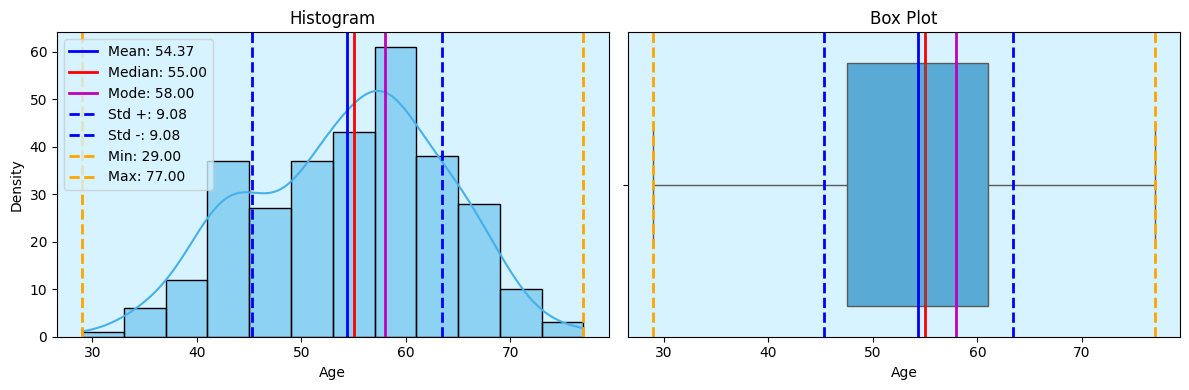

In [25]:
# Age
box_hist_plot("Age")

In [26]:
skewness_dist(heart_df_eda, "Age")


Skewness of the Age variable: -0.202
The distribution is left-skewed.


In [27]:
#Outliers of Age variable
age_outliers, age_lower_bound, age_upper_bound = find_outliers(heart_df_eda['Age'])

print("Lower Bound:", age_lower_bound)
print("Upper Bound:", age_upper_bound)
print("Outliers:", len(age_outliers))

Lower Bound: 27.25
Upper Bound: 81.25
Outliers: 0


In [28]:
outliers.update({"Age":len(age_outliers)})


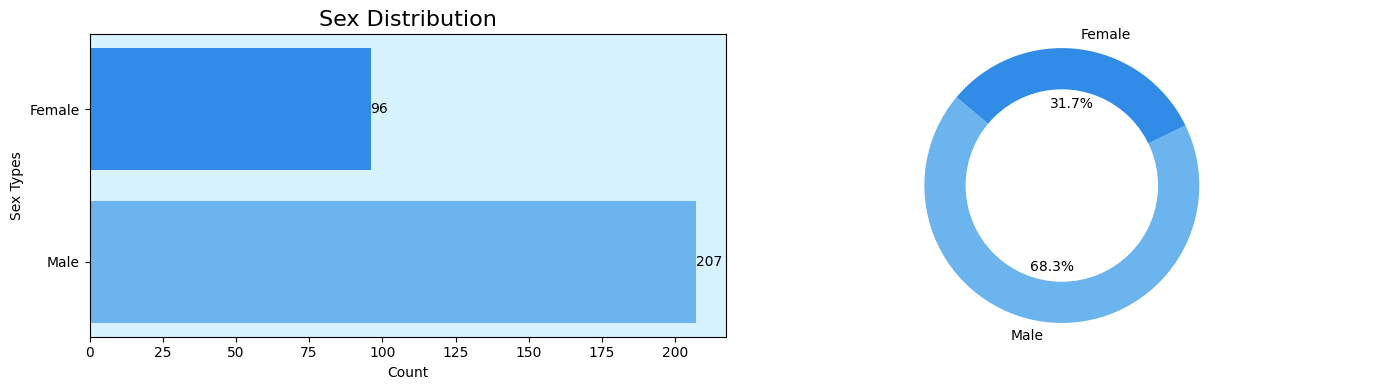

In [29]:
# Sex
bar_donut_chart("Sex")

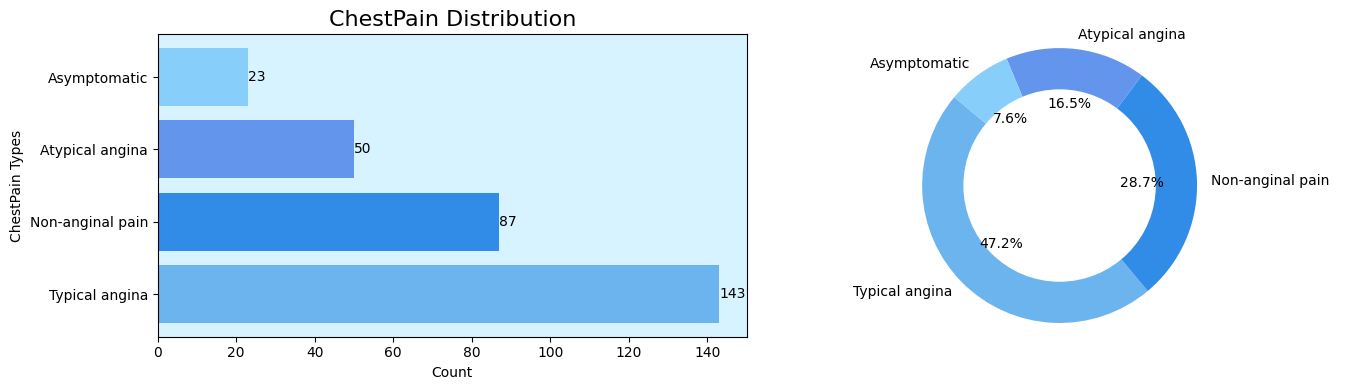

In [30]:
#Chest Pain
bar_donut_chart("ChestPain")

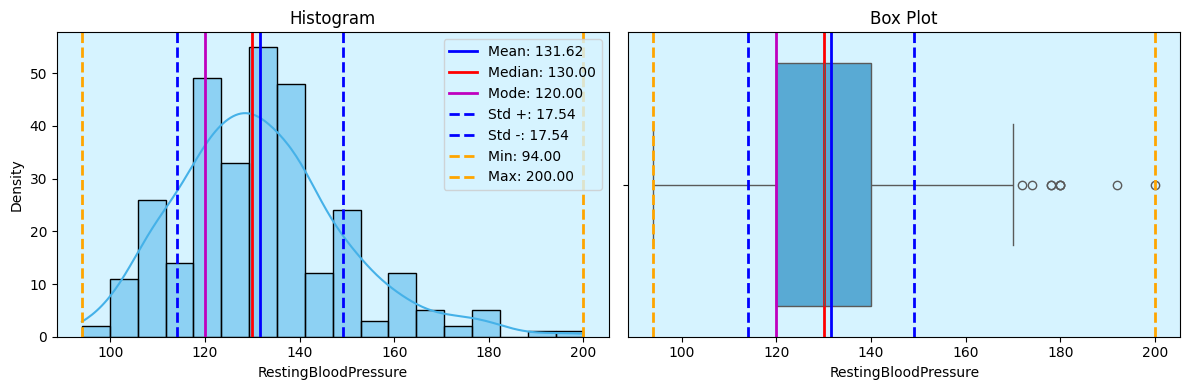

In [31]:
#Resting Blood Pressure
box_hist_plot("RestingBloodPressure")

In [32]:
skewness_dist(heart_df_eda, "RestingBloodPressure")


Skewness of the RestingBloodPressure variable: 0.714
The distribution is right-skewed.


In [33]:
#Outliers of Resting Blood Pressure column:
rbp_outliers, rbp_lower_bound, rbp_upper_bound = find_outliers(heart_df_eda['RestingBloodPressure'])

print("Lower Bound:", rbp_lower_bound)
print("Upper Bound:", rbp_upper_bound)
print("Outliers:", len(rbp_outliers))

Lower Bound: 90.0
Upper Bound: 170.0
Outliers: 9


In [34]:
outliers.update({"RestingBloodPressure":len(rbp_outliers)})


In [35]:
outliers


{'Age': 0, 'RestingBloodPressure': 9}

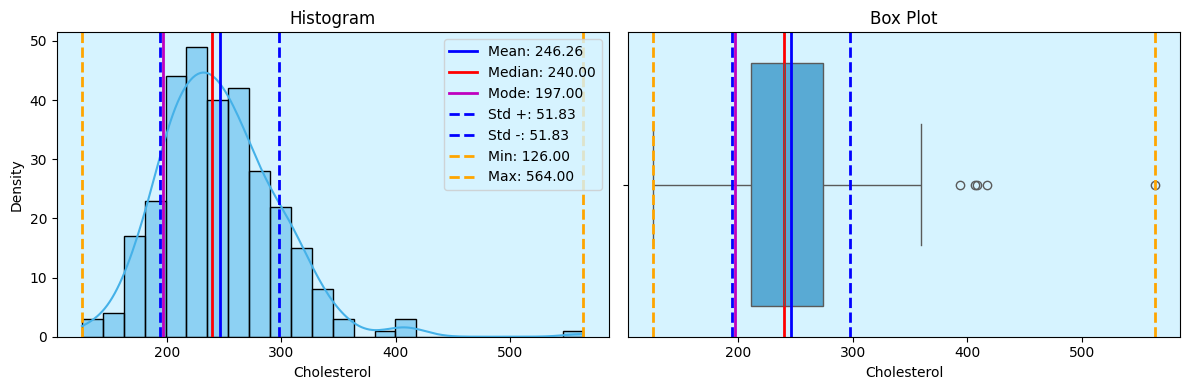

In [36]:
# Cholesterol
box_hist_plot("Cholesterol")

In [37]:
skewness_dist(heart_df_eda, "Cholesterol")


Skewness of the Cholesterol variable: 1.143
The distribution is right-skewed.


In [38]:
ch_outliers, ch_lower_bound, ch_upper_bound = find_outliers(heart_df_eda['Cholesterol'])

print("Lower Bound:", ch_lower_bound)
print("Upper Bound:", ch_upper_bound)
print("Outliers:", len(ch_outliers))

Lower Bound: 115.75
Upper Bound: 369.75
Outliers: 5


In [39]:
outliers.update({"Cholesterol":len(ch_outliers)})


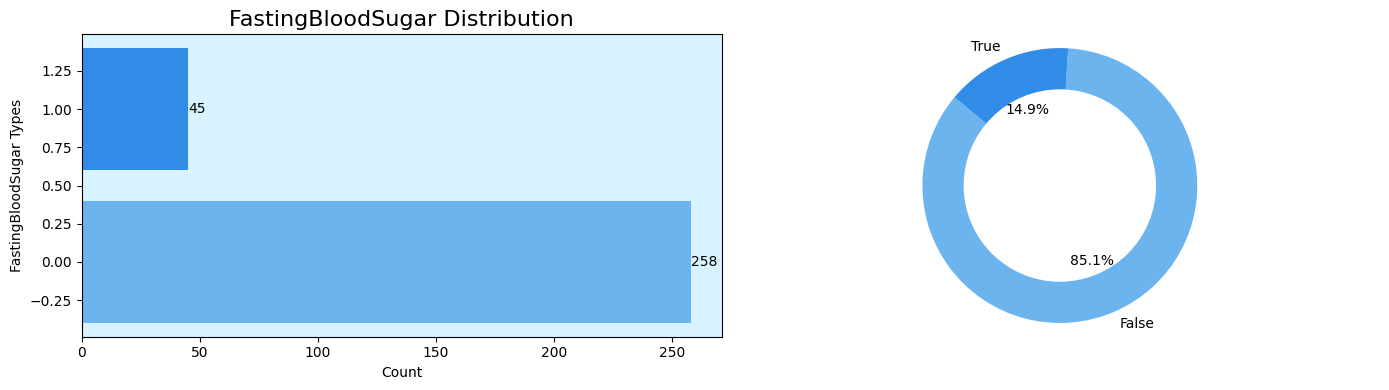

In [40]:
# Fasting Blood Sugar
bar_donut_chart("FastingBloodSugar")

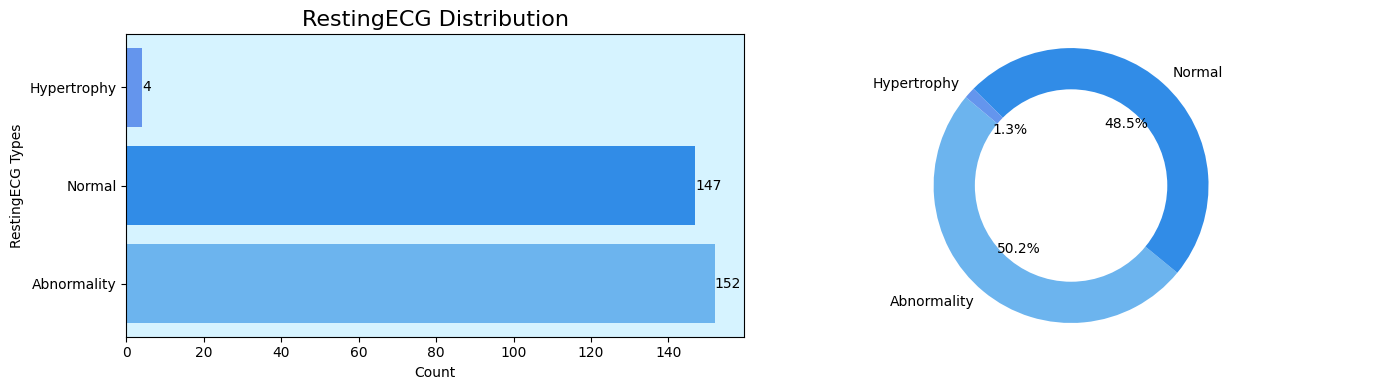

In [41]:
#Resting ECG
bar_donut_chart("RestingECG")

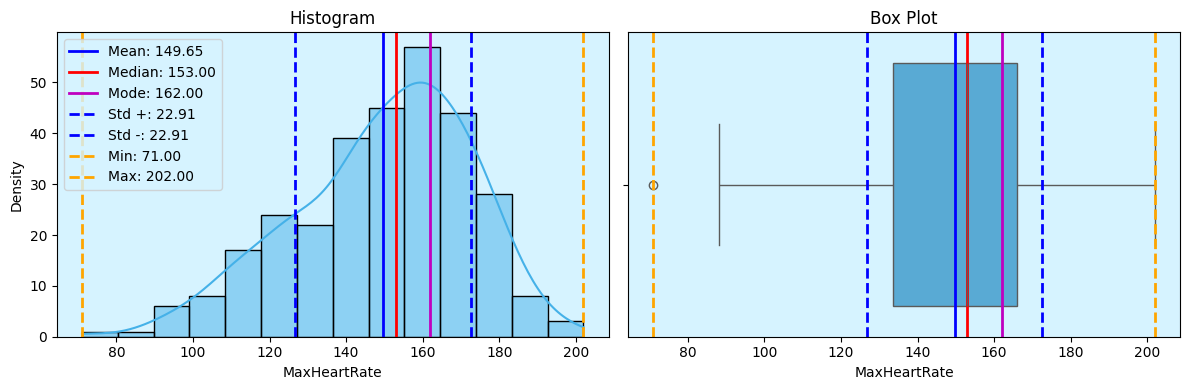

In [42]:
#Max Heart Rate
box_hist_plot("MaxHeartRate")

In [43]:
skewness_dist(heart_df_eda, "MaxHeartRate")

Skewness of the MaxHeartRate variable: -0.537
The distribution is left-skewed.


In [44]:
ecg_outliers, ecg_lower_bound, ecg_upper_bound = find_outliers(heart_df_eda['MaxHeartRate'])

print("Lower Bound:", ecg_lower_bound)
print("Upper Bound:", ecg_upper_bound)
print("Outliers':", len(ecg_outliers))

Lower Bound: 84.75
Upper Bound: 214.75
Outliers': 1


In [45]:
outliers.update({"MaxHeartRate":len(ecg_outliers)})


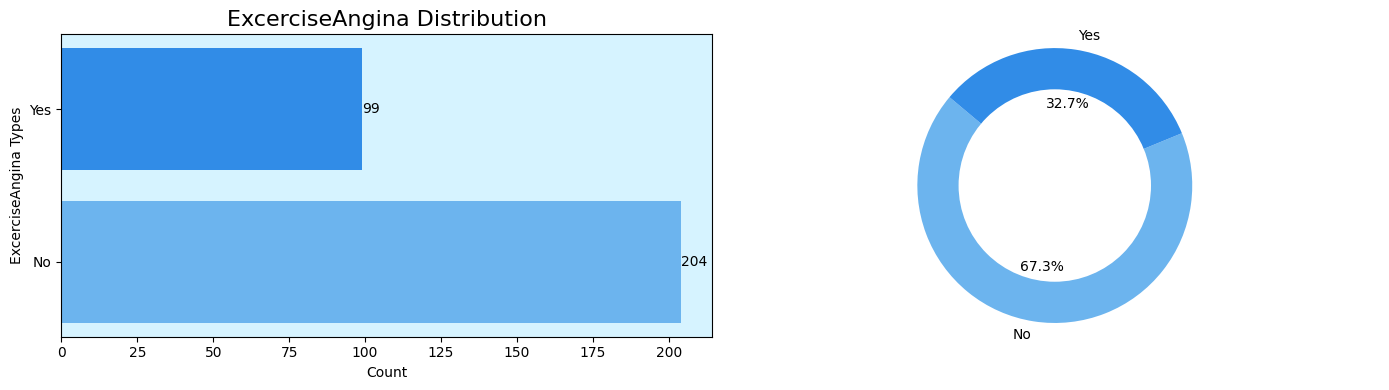

In [46]:
#Excercise Angina
bar_donut_chart("ExcerciseAngina")

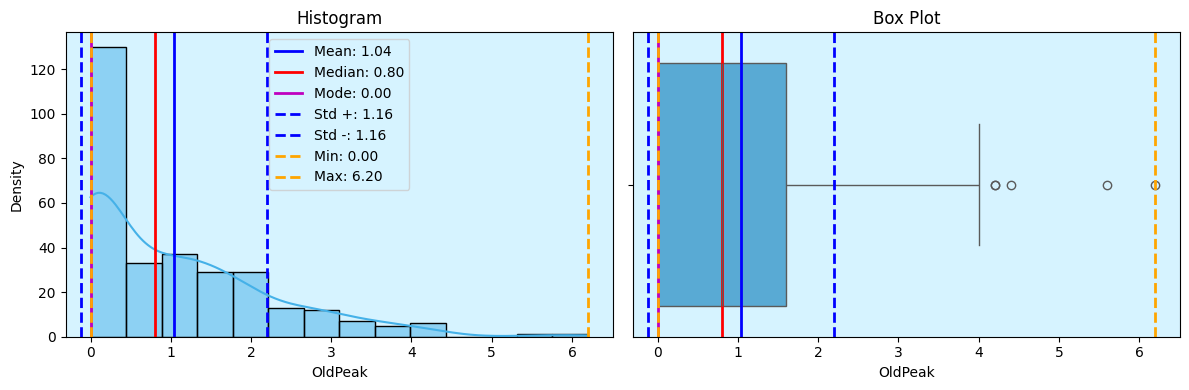

In [47]:
#Old Peak
box_hist_plot("OldPeak")

In [48]:
op_outliers, op_lower_bound, op_upper_bound = find_outliers(heart_df_eda['OldPeak'])

print("Lower Bound:", op_lower_bound)
print("Upper Bound:", op_upper_bound)
print("Outliers':", len(op_outliers))

Lower Bound: -2.4000000000000004
Upper Bound: 4.0
Outliers': 5


In [49]:
outliers.update({"OldPeak":len(op_outliers)})


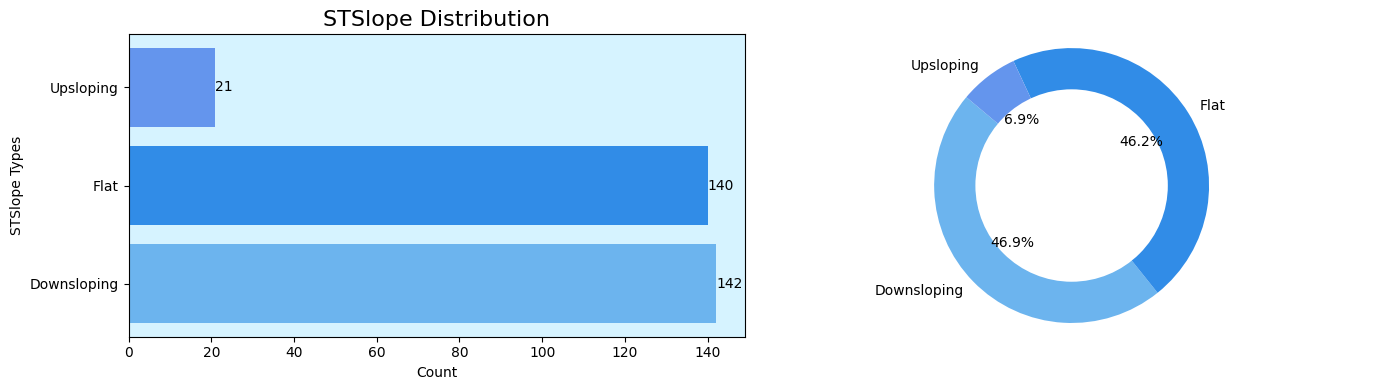

In [50]:
 #STSlope
bar_donut_chart("STSlope")

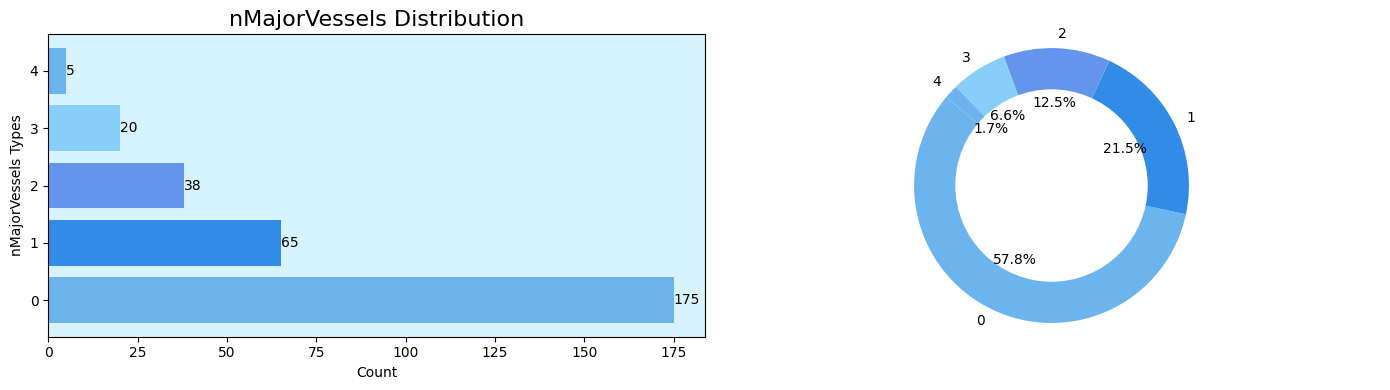

In [51]:
#n Major Vessels
bar_donut_chart("nMajorVessels")

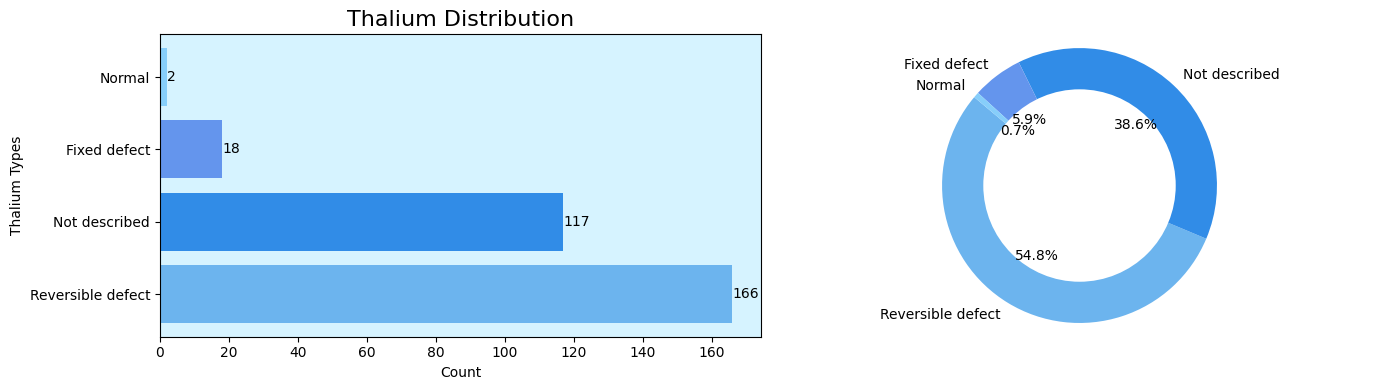

In [52]:
#Thalium
bar_donut_chart("Thalium")

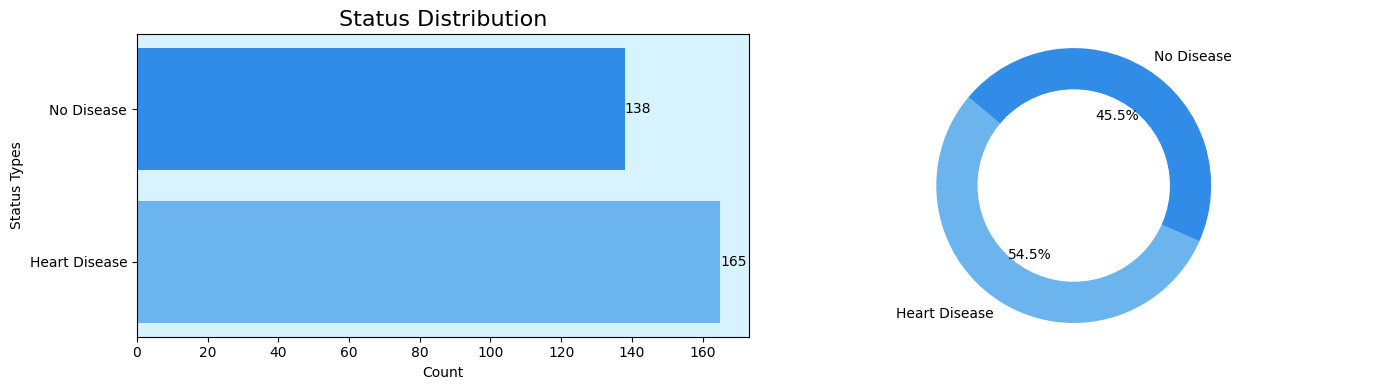

In [53]:
#Status
bar_donut_chart("Status")

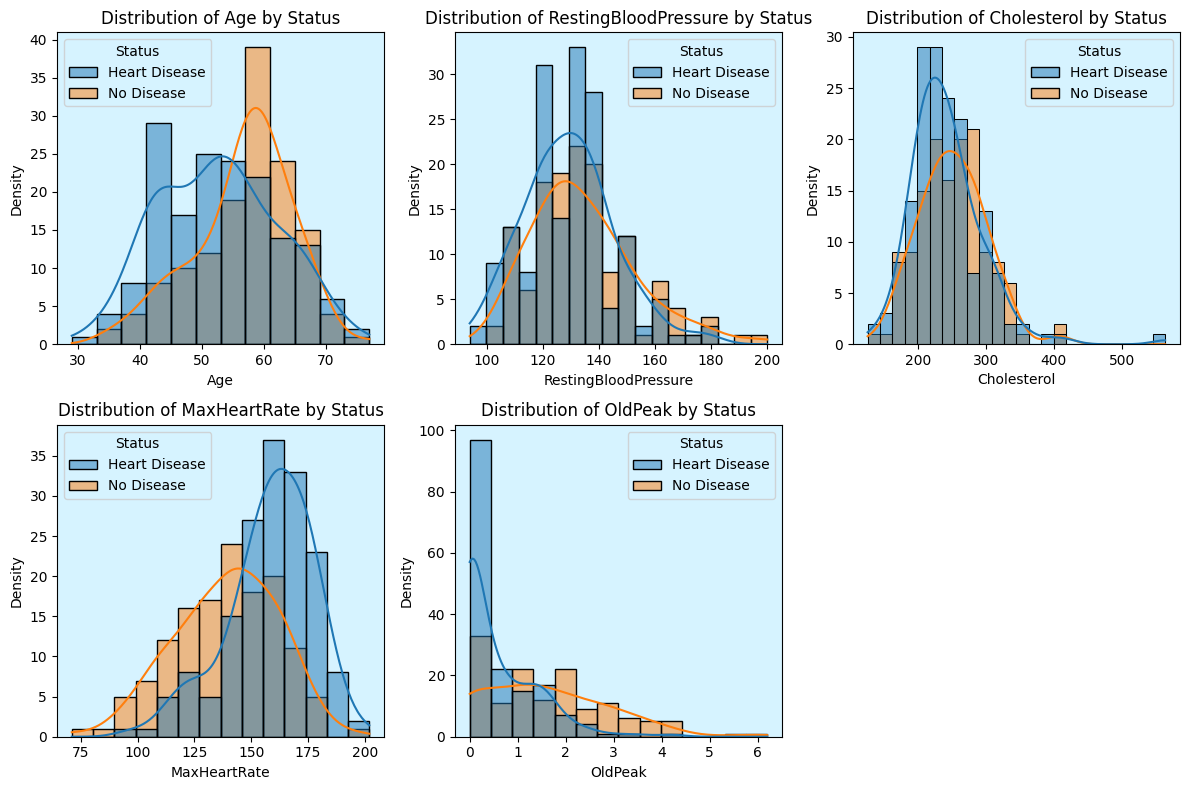

In [54]:
numerical_features = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=heart_df_eda, x=feature, hue='Status', kde=True, fill=True, ax=ax)
    ax.set_title(f'Distribution of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

axes[1, 2].remove()

plt.tight_layout()
plt.show()

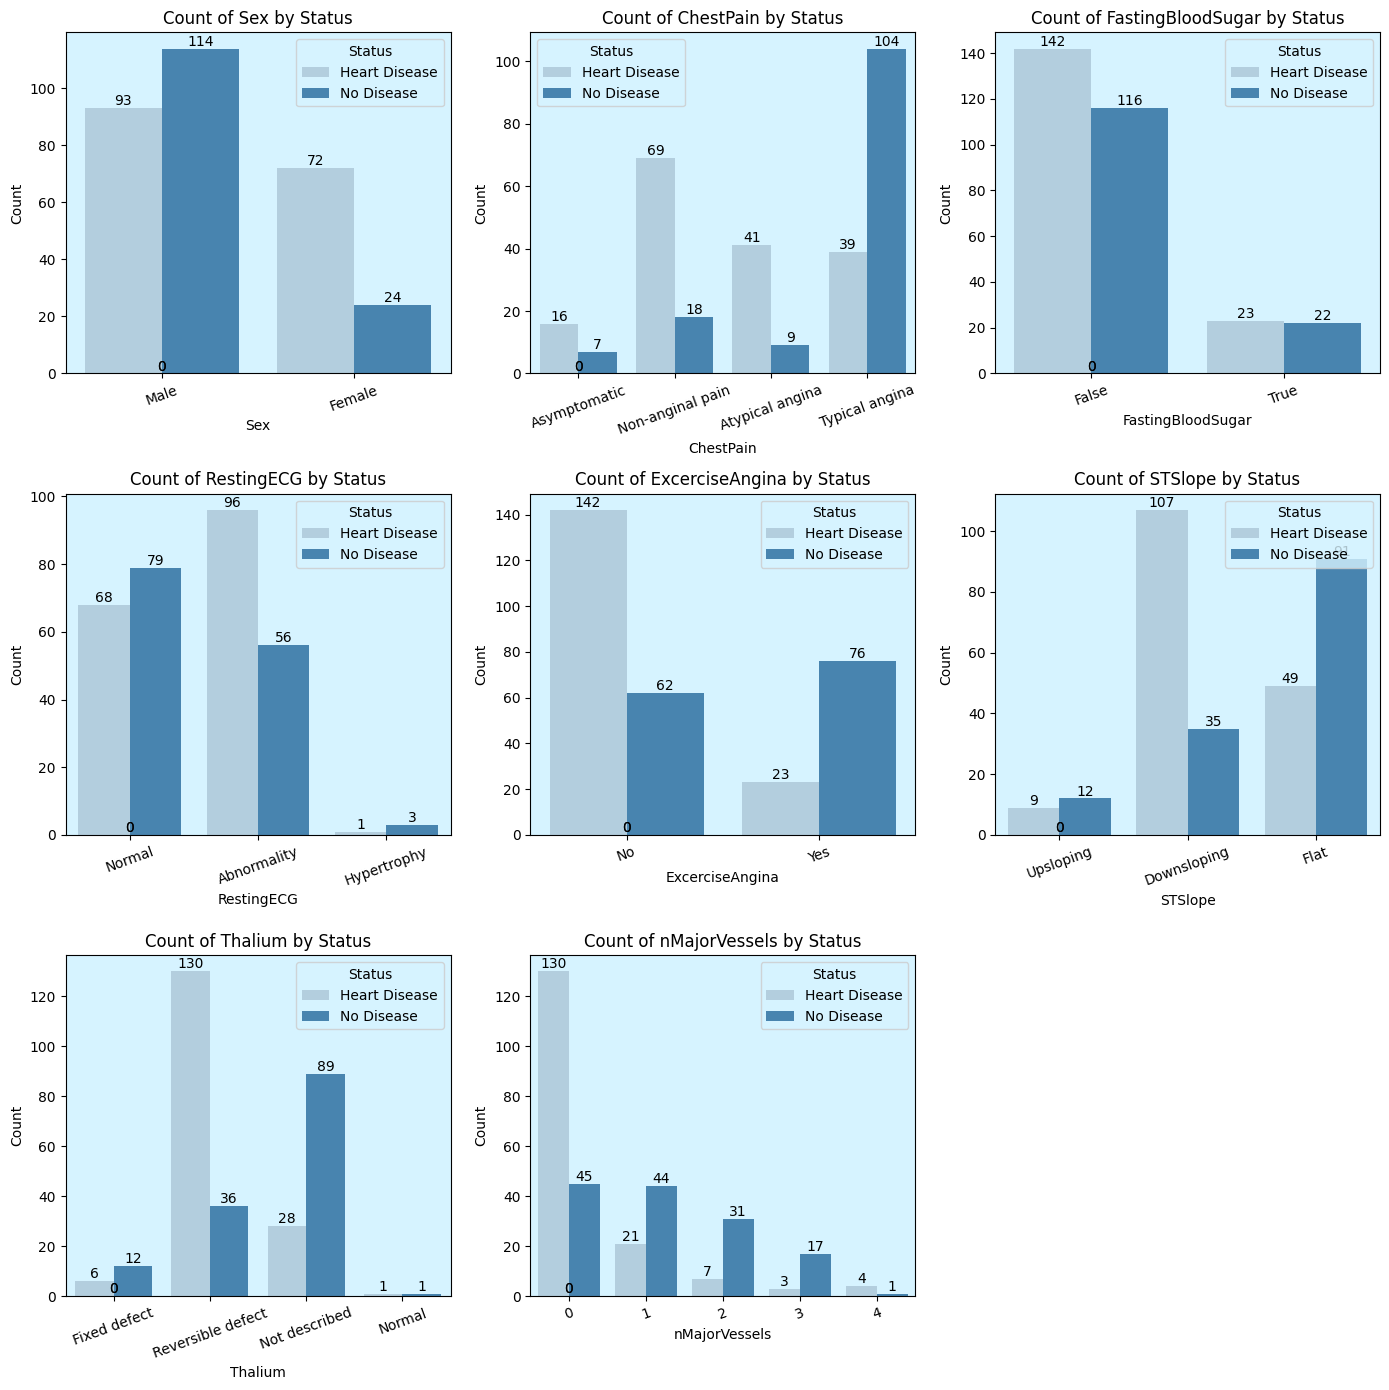

In [55]:
#Binary & Categorical Variables
categorical_features = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingECG', 'ExcerciseAngina', 'STSlope', 'Thalium', 'nMajorVessels']

num_features = len(categorical_features)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 14))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(data=heart_df_eda, x=feature, hue='Status', ax=ax, palette='Blues')
    ax.set_title(f'Count of {feature} by Status')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points',
                    color='black')

for i in range(num_rows):
    for j in range(num_cols):
        if i * 3 + j >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

In [56]:
outliers_df = pd.DataFrame(list(outliers.items()), columns=['Variable', 'Outliers'])
outliers_df

,Variable,Outliers
0,Age,0
1,RestingBloodPressure,9
2,Cholesterol,5
3,MaxHeartRate,1
4,OldPeak,5


In [57]:
def box_cox_transform(heart_df):
    transformed_df = heart_df.copy()
    features_to_transform = ["Age", "RestingBloodPressure", "Cholesterol", "MaxHeartRate", "OldPeak"]

    for feature in features_to_transform:
        if np.any(heart_df[feature] <= 0):
            min_value = abs(heart_df[feature].min()) + 1
            heart_df[feature] += min_value
        transformed_feature, lambda_value = boxcox(heart_df[feature])
        transformed_df[feature] = transformed_feature

    return transformed_df

In [58]:
def plot_transform(heart_df, transformed_df, variable):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

    sns.boxplot(x=heart_df[variable], ax=axes[0, 0], color='#00308F')
    axes[0, 0].set_title(f"Original {variable}")

    sns.boxplot(x=transformed_df[variable], ax=axes[0, 1], color='#7CB9E8')
    axes[0, 1].set_title(f"Transformed {variable}")

    sns.histplot(heart_df[variable], ax=axes[1, 0], kde=True, color='#00308F')
    axes[1, 0].set_title(f"Original {variable} Distribution")

    sns.histplot(transformed_df[variable], ax=axes[1, 1], kde=True, color='#7CB9E8')
    axes[1, 1].set_title(f"Transformed {variable} Distribution")

    plt.tight_layout()
    plt.show()

In [59]:
transformed_df = box_cox_transform(heart_df)


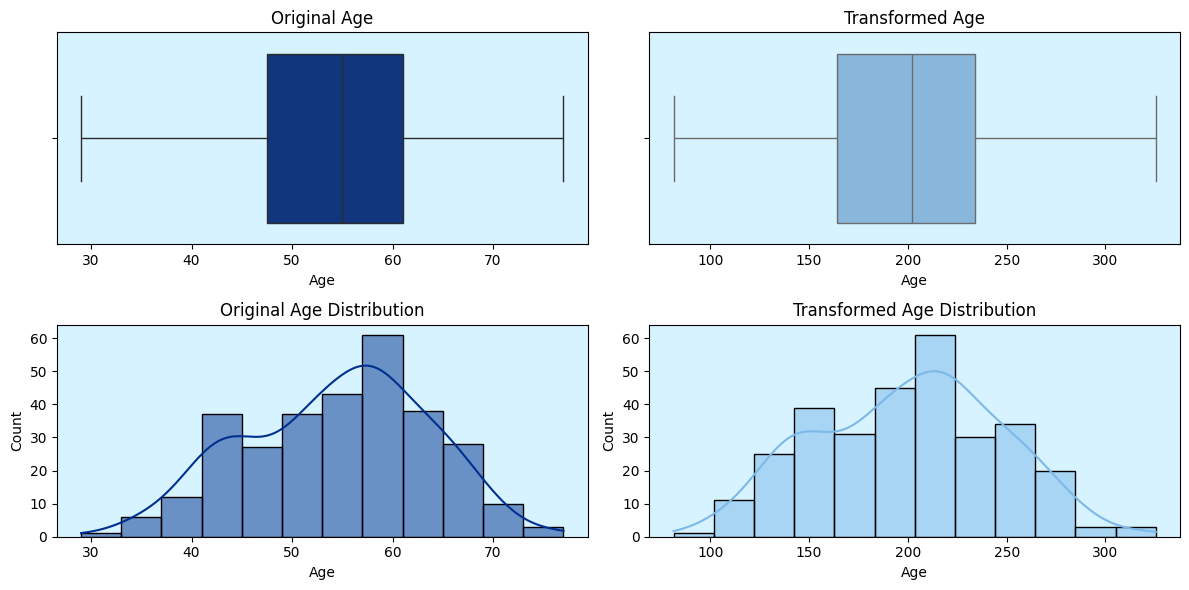

In [60]:
# Age variable
plot_transform(heart_df, transformed_df, 'Age')

In [61]:
skewness_dist(heart_df_eda, "Age")


Skewness of the Age variable: -0.202
The distribution is left-skewed.


In [62]:
skewness_dist(transformed_df, "Age")


Skewness of the Age variable: -0.053
The distribution is left-skewed.


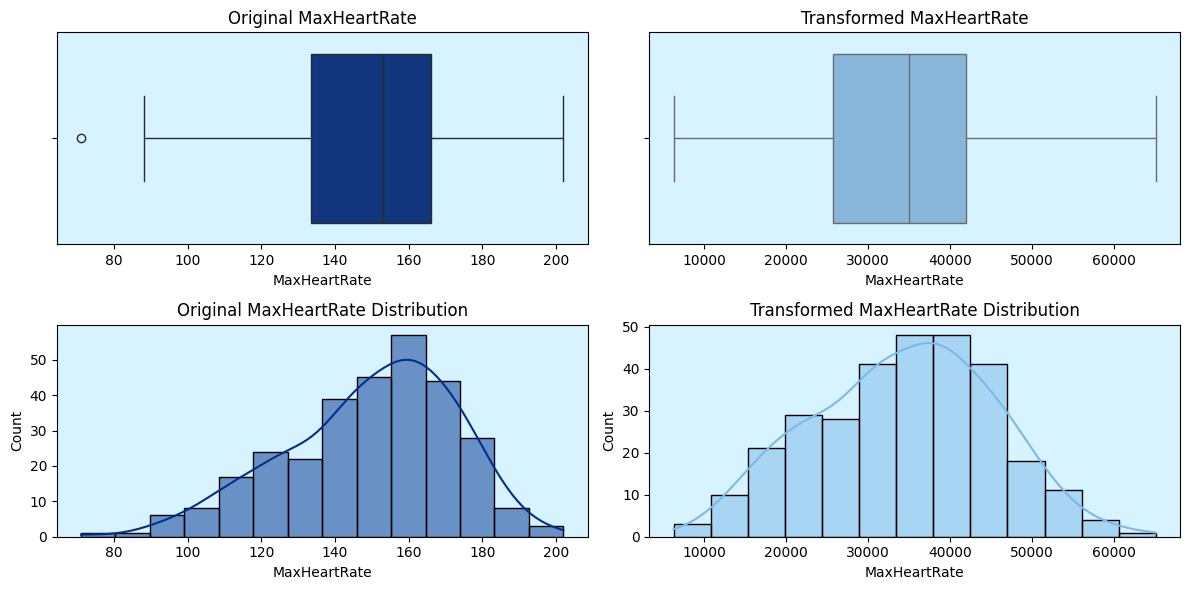

In [63]:
#Max Heart Rate variable
plot_transform(heart_df, transformed_df, 'MaxHeartRate')

In [64]:
skewness_dist(heart_df_eda, "MaxHeartRate")


Skewness of the MaxHeartRate variable: -0.537
The distribution is left-skewed.


In [65]:
skewness_dist(transformed_df, "MaxHeartRate")


Skewness of the MaxHeartRate variable: -0.075
The distribution is left-skewed.


In [66]:
outliers_df["Variable"][3], outliers_df["Outliers"][3]


('MaxHeartRate', 1)

In [67]:
ecg_outliers_bc, ecg_lower_bound_bc, ecg_upper_bound_bc = find_outliers(transformed_df['MaxHeartRate'])

print("Lower Bound:", ecg_lower_bound_bc)
print("Upper Bound:", ecg_upper_bound_bc)
print("Outliers':", len(ecg_outliers_bc))

Lower Bound: 1449.5813416479687
Upper Bound: 66261.20163216196
Outliers': 0


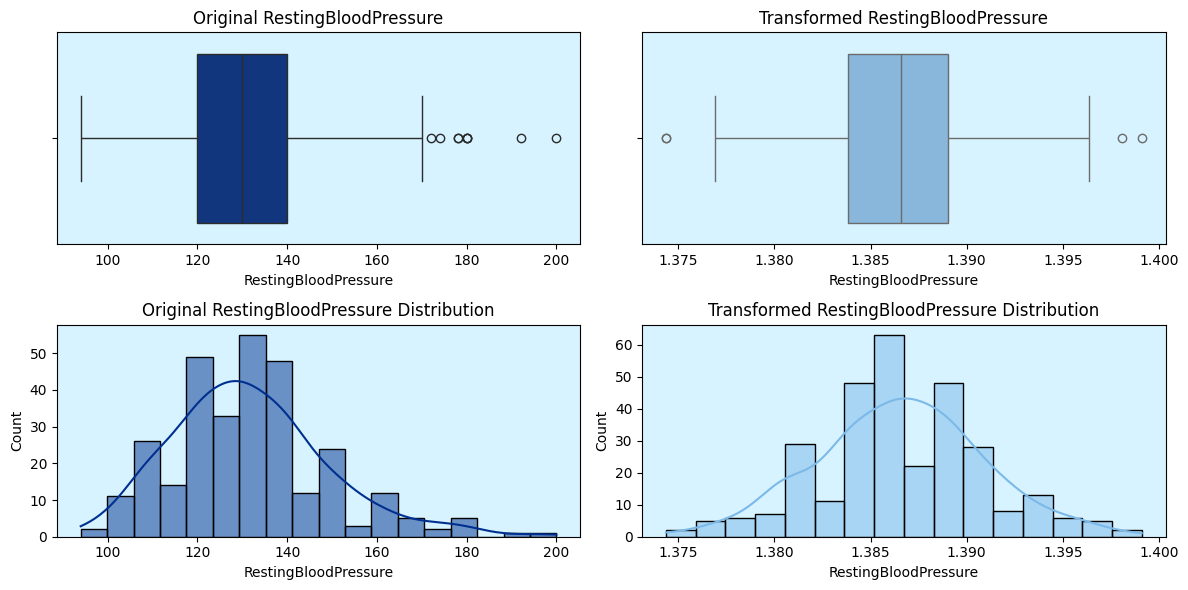

In [68]:
 #Resting Blood Pressure variable
plot_transform(heart_df, transformed_df, 'RestingBloodPressure')

In [69]:
skewness_dist(heart_df_eda, "RestingBloodPressure")


Skewness of the RestingBloodPressure variable: 0.714
The distribution is right-skewed.


In [70]:
skewness_dist(transformed_df, "RestingBloodPressure")


Skewness of the RestingBloodPressure variable: -0.001
The distribution is left-skewed.


In [71]:
outliers_df["Variable"][1], outliers_df["Outliers"][1]


('RestingBloodPressure', 9)

In [72]:
rbp_outliers_bc, rbp_lower_bound_bc, rbp_upper_bound_bc = find_outliers(transformed_df['RestingBloodPressure'])

print("Lower Bound:", rbp_lower_bound_bc)
print("Upper Bound:", rbp_upper_bound_bc)
print("Outliers:", len(rbp_outliers_bc))

Lower Bound: 1.3760249306944374
Upper Bound: 1.3968131245105593
Outliers: 4


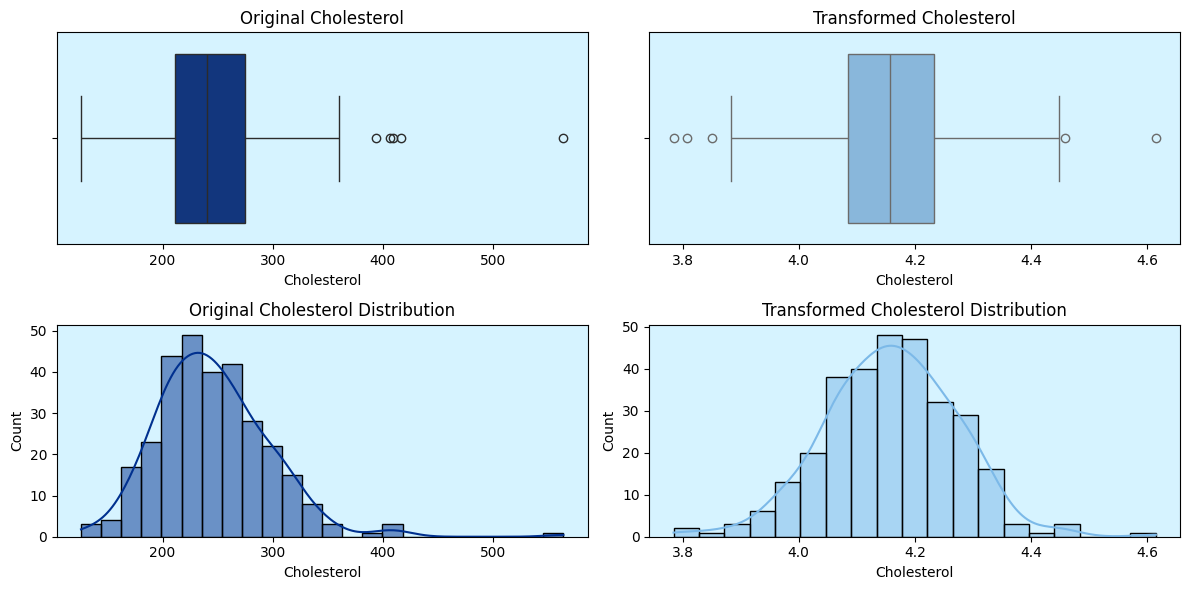

In [73]:
#Cholesterol variable
plot_transform(heart_df, transformed_df, 'Cholesterol')

In [74]:
transformed_df = box_cox_transform(heart_df)


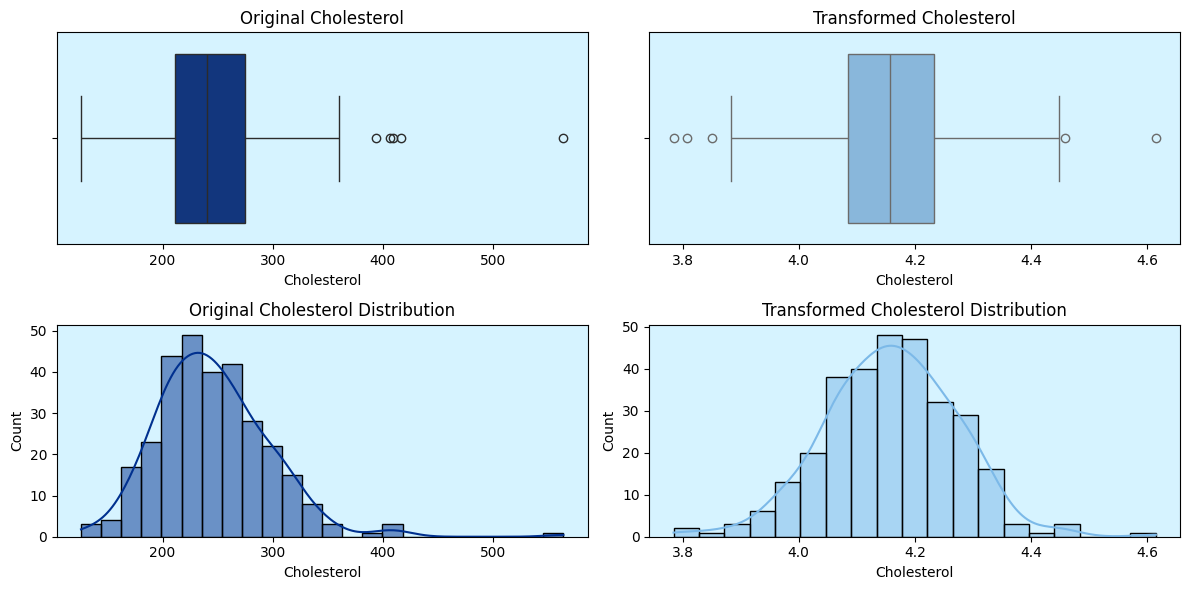

In [75]:
plot_transform(heart_df, transformed_df, 'Cholesterol')


In [76]:
skewness_dist(heart_df_eda, "Cholesterol")


Skewness of the Cholesterol variable: 1.143
The distribution is right-skewed.


In [77]:
skewness_dist(transformed_df, "Cholesterol")


Skewness of the Cholesterol variable: -0.006
The distribution is left-skewed.


In [78]:
ch_outliers_bc, ch_lower_bound_bc, ch_upper_bound_bc = find_outliers(transformed_df['Cholesterol'])

print("Lower Bound:", ch_lower_bound_bc)
print("Upper Bound:", ch_upper_bound_bc)
print("Outliers:", len(ch_outliers_bc))

Lower Bound: 3.864332295042104
Upper Bound: 4.453078106789231
Outliers: 5


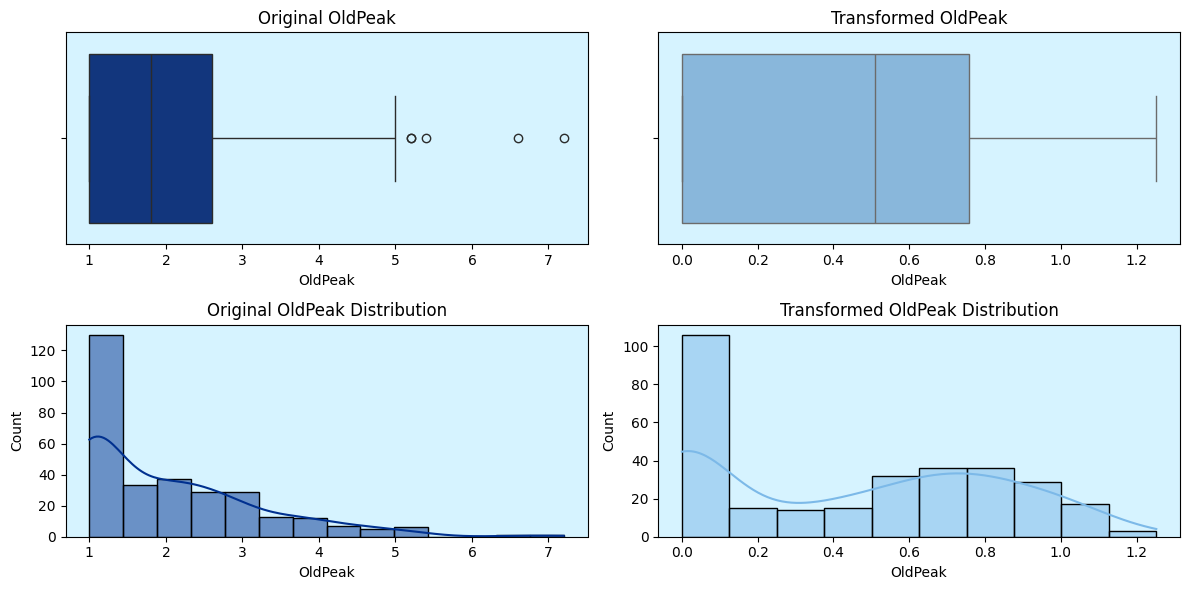

In [79]:
# Old Peak variable
plot_transform(heart_df, transformed_df, 'OldPeak')

In [80]:
skewness_dist(heart_df_eda, "OldPeak")
skewness_dist(transformed_df, "OldPeak")

Skewness of the OldPeak variable: 1.270
The distribution is right-skewed.
Skewness of the OldPeak variable: 0.124
The distribution is right-skewed.


In [81]:
op_outliers_bc, op_lower_bound_bc, op_upper_bound_bc = find_outliers(transformed_df['OldPeak'])

print("Lower Bound:", op_lower_bound_bc)
print("Upper Bound:", op_upper_bound_bc)
print("Outliers':", len(op_outliers_bc))

Lower Bound: -1.1382439503934751
Upper Bound: 1.897073250655792
Outliers': 0


In [82]:
transformed = transformed_df.copy()


In [83]:
heart_df_copy = heart_df.copy()


In [84]:
heart_df.isnull().sum()


Age                     0
Sex                     0
ChestPain               0
RestingBloodPressure    0
Cholesterol             0
FastingBloodSugar       0
RestingECG              0
MaxHeartRate            0
ExcerciseAngina         0
OldPeak                 0
STSlope                 0
nMajorVessels           0
Thalium                 0
Status                  0
dtype: int64

In [85]:
duplicated_rows = heart_df.duplicated()
heart_df[duplicated_rows]

,Age,Sex,ChestPain,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExcerciseAngina,OldPeak,STSlope,nMajorVessels,Thalium,Status
164,38,Male,Non-anginal pain,138,175,False,Abnormality,173,No,1.0,Downsloping,4,Reversible defect,Heart Disease


In [86]:
heart_df.drop(index=164, axis=0, inplace=True)


In [87]:
transformed.drop(index=164, axis=0, inplace=True)


In [88]:
features_to_encode = ["ChestPain", "RestingECG", "STSlope", "Thalium"]


In [89]:
heart_df = pd.get_dummies(heart_df, columns=features_to_encode)


In [90]:
transformed = pd.get_dummies(transformed, columns=features_to_encode)


In [91]:
bool_columns = transformed.select_dtypes(include=bool).columns
transformed[bool_columns] = transformed[bool_columns].astype("int64")

In [92]:
bool_columns2 = heart_df.select_dtypes(include=bool).columns
heart_df[bool_columns2] = heart_df[bool_columns2].astype("int64")

In [93]:
label_encoder = LabelEncoder()


In [94]:
features_to_encode = ['Sex', 'FastingBloodSugar', 'ExcerciseAngina', 'Status']


In [95]:
for feature in features_to_encode:
    transformed[feature] = label_encoder.fit_transform(transformed[feature])

In [96]:
for feature in features_to_encode:
    heart_df[feature] = label_encoder.fit_transform(heart_df[feature])

In [97]:
transformed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         302 non-null    float64
 1   Sex                         302 non-null    int64  
 2   RestingBloodPressure        302 non-null    float64
 3   Cholesterol                 302 non-null    float64
 4   FastingBloodSugar           302 non-null    int64  
 5   MaxHeartRate                302 non-null    float64
 6   ExcerciseAngina             302 non-null    int64  
 7   OldPeak                     302 non-null    float64
 8   nMajorVessels               302 non-null    int64  
 9   Status                      302 non-null    int64  
 10  ChestPain_Asymptomatic      302 non-null    int64  
 11  ChestPain_Atypical angina   302 non-null    int64  
 12  ChestPain_Non-anginal pain  302 non-null    int64  
 13  ChestPain_Typical angina    302 non-null

In [98]:
df_corr = heart_df.copy()


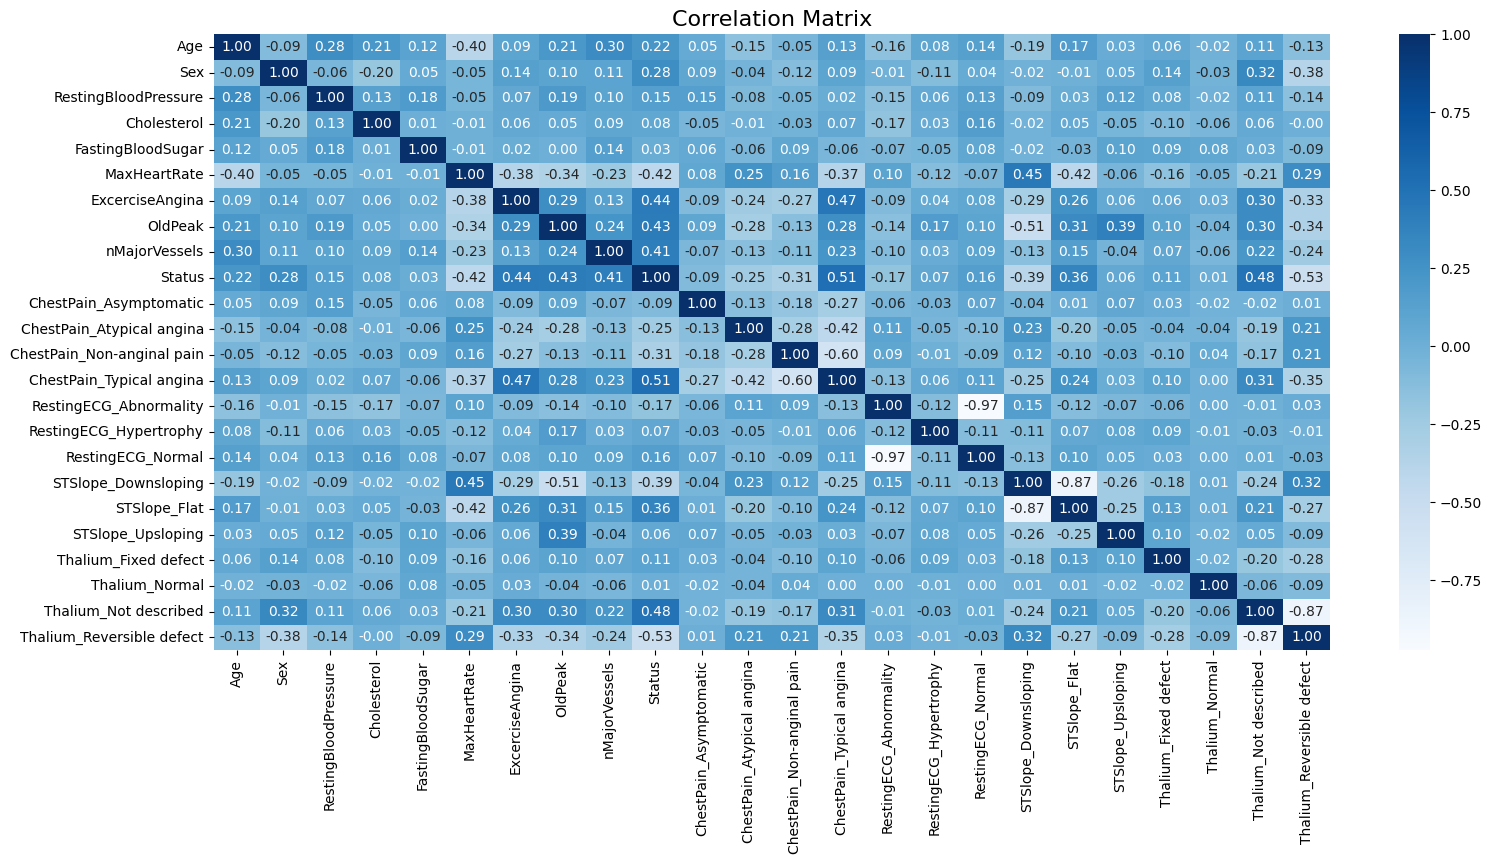

In [99]:
df_correlation = df_corr.corr()

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [100]:
heart_df2 = transformed.copy()


In [101]:
transformed.drop(["ChestPain_Asymptomatic", "RestingECG_Hypertrophy", "STSlope_Upsloping", "Thalium_Normal"], axis=1, inplace=True)

In [102]:
df3_no_transformed = heart_df2.copy()


In [103]:
heart_df3 = transformed.copy()


In [104]:
heart_df3


,Age,Sex,RestingBloodPressure,Cholesterol,FastingBloodSugar,MaxHeartRate,ExcerciseAngina,OldPeak,nMajorVessels,Status,ChestPain_Atypical angina,ChestPain_Non-anginal pain,ChestPain_Typical angina,RestingECG_Abnormality,RestingECG_Normal,STSlope_Downsloping,STSlope_Flat,Thalium_Fixed defect,Thalium_Not described,Thalium_Reversible defect
0,245.026003,1,1.390125,4.141081,1,33435.178719,0,0.897845,0,0,0,0,0,0,1,0,0,1,0,0
1,115.210734,1,1.386589,4.180465,0,54788.235951,0,1.055476,0,0,0,1,0,1,0,0,0,0,0,1
2,133.288287,0,1.386589,4.065939,0,45430.223348,0,0.708296,0,0,1,0,0,0,1,1,0,0,0,1
3,207.381618,1,1.383821,4.148257,0,49057.156271,0,0.508937,0,0,1,0,0,1,0,1,0,0,0,1
4,212.646759,0,1.383821,4.370746,0,40277.331099,1,0.418628,0,0,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,212.646759,0,1.389018,4.159997,0,21435.956407,1,0.174220,0,1,0,0,1,1,0,0,1,0,1,0
299,152.107773,1,1.380631,4.210738,0,25109.759124,0,0.651009,0,1,0,0,0,1,0,0,1,0,1,0
300,273.002120,1,1.389908,4.034289,1,29107.774522,0,1.044861,2,1,0,0,1,1,0,0,1,0,1,0
301,212.646759,1,1.386589,3.807768,0,18438.131804,1,0.651009,1,1,0,0,1,1,0,0,1,0,1,0


In [105]:
features_to_scale = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'OldPeak', 'nMajorVessels']

scaler = StandardScaler()

scaler.fit(transformed[features_to_scale])

transformed_scaled = scaler.transform(transformed[features_to_scale])
transformed[features_to_scale] = transformed_scaled

In [106]:
transformed[features_to_scale] = scaler.fit_transform(transformed[features_to_scale])


In [107]:
heart_df3[features_to_scale] = scaler.fit_transform(heart_df[features_to_scale])


In [108]:
import pandas as pd  # Import pandas module

def customize_split(heart_df):
    df_shuffled = heart_df.sample(frac=1, random_state=42)

    train_size = 0.7
    test_size = 0.3

    num_samples = len(df_shuffled)
    num_samples_train = int(num_samples * train_size)
    num_samples_test = num_samples - num_samples_train

    train_df = df_shuffled.head(num_samples_train)

    num_samples_per_class_test = int(num_samples_test / 2)
    test_df = pd.concat([df_shuffled[df_shuffled['Status'] == 0].tail(num_samples_per_class_test),
                         df_shuffled[df_shuffled['Status'] == 1].tail(num_samples_per_class_test)])

    X_train = train_df.drop(columns=['Status'])
    y_train = train_df['Status'].values

    X_test = test_df.drop(columns=['Status'])
    y_test = test_df['Status'].values

    print(test_df['Status'].value_counts())

    percent_train = (len(train_df) / len(df_shuffled)) * 100
    percent_test = (len(test_df) / len(df_shuffled)) * 100

    return X_train, X_test, y_train, y_test, percent_train, percent_test

# Example usage:
# transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, ptrain_df2, ptest_df2 = customize_split(transformed)
# df3_X_train, df3_X_test, df3_y_train, df3_y_test, ptrain_df3, ptest_df3 = customize_split(heart_df3)


In [109]:
df2_X_train, df2_X_test, df2_y_train, df2_y_test, ptrain_df2, ptest_df2 = customize_split(heart_df2)
transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, ptrain_df2, ptest_df2 = customize_split(transformed)

Status
0    45
1    45
Name: count, dtype: int64
Status
0    45
1    45
Name: count, dtype: int64


In [110]:
print(f"Percentage of samples for training: {ptrain_df2:.2f}%")
print(f"Percentage of samples for testing: {ptest_df2:.2f}%")

Percentage of samples for training: 69.87%
Percentage of samples for testing: 29.80%


In [111]:
(pd.DataFrame(df2_y_train)).value_counts()


0    114
1     97
Name: count, dtype: int64

In [112]:
df3_X_train, df3_X_test, df3_y_train, df3_y_test, ptrain_df3, ptest_df3 = customize_split(heart_df3)

Status
0    45
1    45
Name: count, dtype: int64


Status
0    45
1    45
Name: count, dtype: int64
Status
0    45
1    45
Name: count, dtype: int64
Linear Regression Confusion Matrix:
[[42  3]
 [12 33]]
Linear Regression Accuracy: 0.8333333333333334
Linear Regression Precision: 0.9166666666666666
Linear Regression Recall: 0.7333333333333333
Linear Regression F1-score: 0.8148148148148148


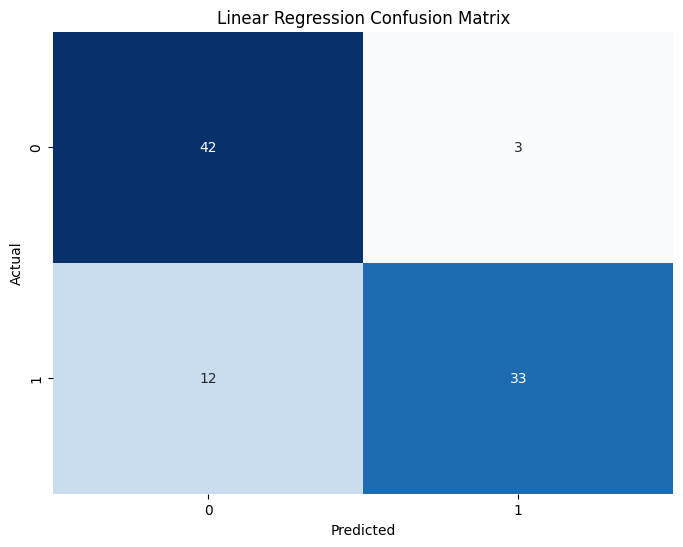

In [117]:
# Call the customize_split function and assign the return values to variables
transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, ptrain_df2, ptest_df2 = customize_split(transformed)
df3_X_train, df3_X_test, df3_y_train, df3_y_test, ptrain_df3, ptest_df3 = customize_split(heart_df3)

# Initialize the classifier (Linear Regression)
clf_lr = LinearRegression()

# Train the classifier
clf_lr.fit(transformed_X_train, transformed_y_train)

# Make predictions on the test set
y_pred_lr = clf_lr.predict(transformed_X_test)

# Since Linear Regression is a regression algorithm, you need to convert its predictions to binary labels for confusion matrix and classification metrics.
# For example, you can use a threshold to convert continuous predictions to binary labels.
threshold = 0.5
y_pred_lr_binary = (y_pred_lr > threshold).astype(int)

# Generate confusion matrix for Linear Regression
cm_lr = confusion_matrix(transformed_y_test, y_pred_lr_binary)

# Calculate accuracy metrics for Linear Regression
accuracy_lr = accuracy_score(transformed_y_test, y_pred_lr_binary)
precision_lr = precision_score(transformed_y_test, y_pred_lr_binary)
recall_lr = recall_score(transformed_y_test, y_pred_lr_binary)
f1_lr = f1_score(transformed_y_test, y_pred_lr_binary)

print("Linear Regression Confusion Matrix:")
print(cm_lr)
print("Linear Regression Accuracy:", accuracy_lr)
print("Linear Regression Precision:", precision_lr)
print("Linear Regression Recall:", recall_lr)
print("Linear Regression F1-score:", f1_lr)

# Plot confusion matrix heatmap for Linear Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Linear Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Status
0    45
1    45
Name: count, dtype: int64
Status
0    45
1    45
Name: count, dtype: int64
SVM with RBF Kernel Confusion Matrix:
[[40  5]
 [11 34]]
SVM with RBF Kernel Accuracy: 0.8222222222222222
SVM with RBF Kernel Precision: 0.8717948717948718
SVM with RBF Kernel Recall: 0.7555555555555555
SVM with RBF Kernel F1-score: 0.8095238095238095


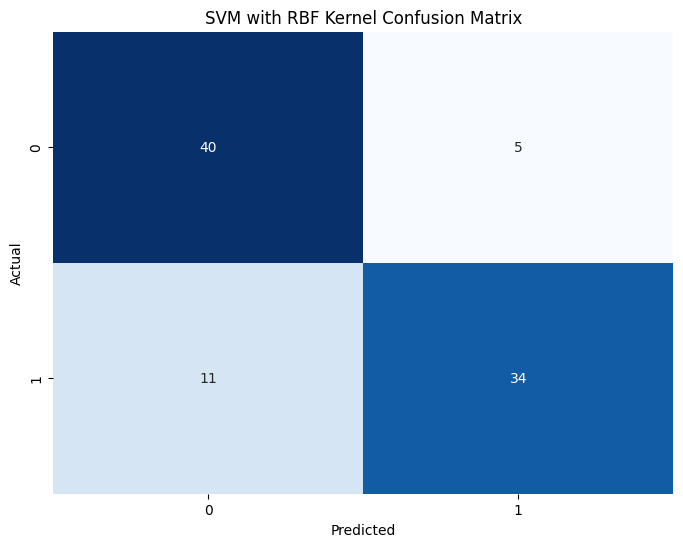

In [114]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Call the customize_split function and assign the return values to variables
transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, ptrain_df2, ptest_df2 = customize_split(transformed)
df3_X_train, df3_X_test, df3_y_train, df3_y_test, ptrain_df3, ptest_df3 = customize_split(heart_df3)

# Initialize the SVM classifier with RBF kernel
clf_svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the classifier
clf_svm_rbf.fit(transformed_X_train, transformed_y_train)

# Make predictions on the test set
y_pred_svm_rbf = clf_svm_rbf.predict(transformed_X_test)

# Generate confusion matrix for SVM with RBF kernel
cm_svm_rbf = confusion_matrix(transformed_y_test, y_pred_svm_rbf)

# Calculate accuracy metrics for SVM with RBF kernel
accuracy_svm_rbf = accuracy_score(transformed_y_test, y_pred_svm_rbf)
precision_svm_rbf = precision_score(transformed_y_test, y_pred_svm_rbf)
recall_svm_rbf = recall_score(transformed_y_test, y_pred_svm_rbf)
f1_svm_rbf = f1_score(transformed_y_test, y_pred_svm_rbf)

print("SVM with RBF Kernel Confusion Matrix:")
print(cm_svm_rbf)
print("SVM with RBF Kernel Accuracy:", accuracy_svm_rbf)
print("SVM with RBF Kernel Precision:", precision_svm_rbf)
print("SVM with RBF Kernel Recall:", recall_svm_rbf)
print("SVM with RBF Kernel F1-score:", f1_svm_rbf)

# Plot confusion matrix heatmap for SVM with RBF kernel
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_rbf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM with RBF Kernel Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Status
0    45
1    45
Name: count, dtype: int64
Status
0    45
1    45
Name: count, dtype: int64
KNN Confusion Matrix:
[[38  7]
 [12 33]]
KNN Accuracy: 0.7888888888888889
KNN Precision: 0.825
KNN Recall: 0.7333333333333333
KNN F1-score: 0.776470588235294


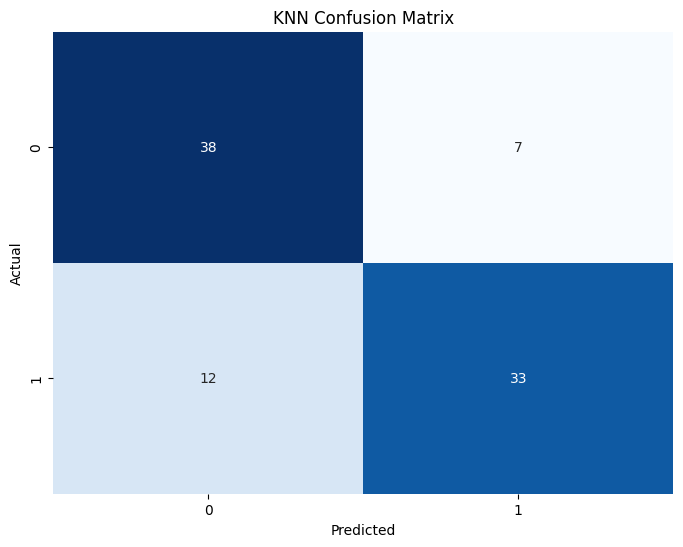

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Call the customize_split function and assign the return values to variables
transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test, ptrain_df2, ptest_df2 = customize_split(transformed)
df3_X_train, df3_X_test, df3_y_train, df3_y_test, ptrain_df3, ptest_df3 = customize_split(heart_df3)

# Initialize the KNN classifier with k=15
clf_knn = KNeighborsClassifier(n_neighbors=15)

# Train the classifier
clf_knn.fit(transformed_X_train, transformed_y_train)

# Make predictions on the test set
y_pred_knn = clf_knn.predict(transformed_X_test)

# Generate confusion matrix for KNN
cm_knn = confusion_matrix(transformed_y_test, y_pred_knn)

# Calculate accuracy metrics for KNN
accuracy_knn = accuracy_score(transformed_y_test, y_pred_knn)
precision_knn = precision_score(transformed_y_test, y_pred_knn)
recall_knn = recall_score(transformed_y_test, y_pred_knn)
f1_knn = f1_score(transformed_y_test, y_pred_knn)

print("KNN Confusion Matrix:")
print(cm_knn)
print("KNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN F1-score:", f1_knn)

# Plot confusion matrix heatmap for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




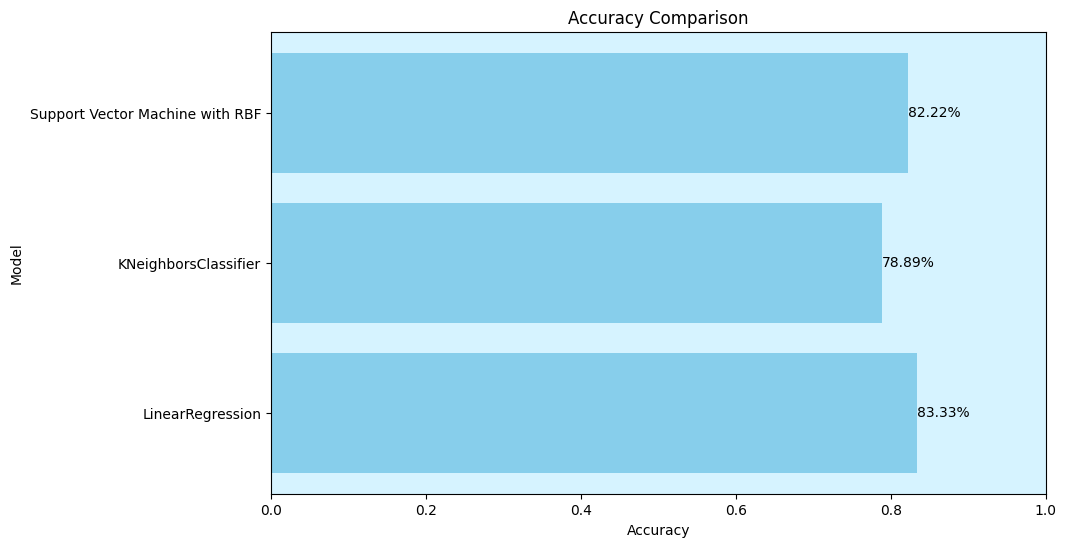

In [116]:
# List of classifiers and their corresponding accuracy scores
classifiers = [ 'Support Vector Machine with RBF', 'KNeighborsClassifier','LinearRegression']
accuracies = [ accuracy_svm_rbf , accuracy_knn, accuracy_lr]

# Plotting the accuracy scores with percentages
plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Comparison')
plt.xlim(0, 1)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top

# Percentage labels on each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{accuracy*100:.2f}%',
             va='center', ha='left', fontsize=10, color='black')

plt.show()
